https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

Site used to help with Multiple Linear Regression

In [52]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [53]:
# Only using 2018 data for now
df = pd.read_csv(('Cleaned_Kaggle_2018.csv'))
df.head()

,Age,Gender,Country,Formal_Education,Position,Years_Coding,Salary
0,23.0,Male,France,Master’s degree,Software Engineer,2.0,34999.5
1,42.0,Male,India,Professional degree,Software Engineer,0.0,6249.5
2,42.0,Male,Australia,Master’s degree,Other,2.0,274999.5
3,52.0,Male,France,Master’s degree,Data Scientist,20.0,64999.5
4,23.0,Male,India,Master’s degree,Data Scientist,5.0,12499.5


In [54]:
df.shape
df.describe()

,Age,Years_Coding,Salary
count,8456.000000,8456.000000,8456.000000
mean,34.968661,7.419939,61166.781339
std,10.022997,6.376904,62079.113308
min,19.500000,0.000000,1499.500000
25%,27.000000,2.000000,12499.500000
50%,32.000000,5.000000,44999.500000
75%,42.000000,10.000000,84999.500000
max,64.500000,20.000000,400000.000000


In [55]:
df.dtypes

Age                 float64
Gender               object
Country              object
Formal_Education     object
Position             object
Years_Coding        float64
Salary              float64
dtype: object

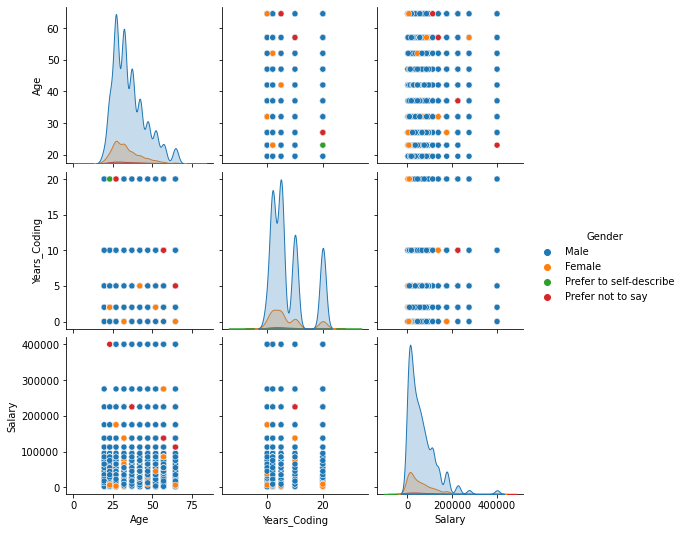

In [56]:
sns.pairplot(df,hue='Gender')

From the graphs above, obviously more males than females.  With more years of coding and age, comes a higher salary.

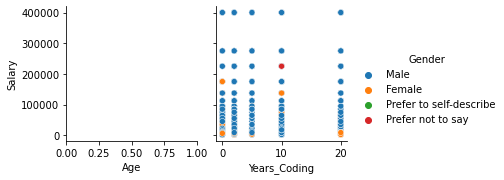

In [57]:
sns.pairplot(df,x_vars=['Age','Years_Coding'],y_vars=['Salary'],hue='Gender')

In [58]:
df.corr()

,Age,Years_Coding,Salary
Age,1.000000,0.412836,0.320936
Years_Coding,0.412836,1.000000,0.385877
Salary,0.320936,0.385877,1.000000


Correlation and regression analysis are related in the sense that both deal with relationships among variables. The correlation coefficient is a measure of linear association between two variables. The values of the correlation coefficient are always between -1 and +1. A correlation coefficient of +1 indicates that two variables are perfectly related in a positive linear sense, a correlation coefficient of -1 indicates that two variables are perfectly related in a negative linear sense, and a correlation coefficient of 0 indicates that there is no linear relationship between the two variables.

There is a positive correlation for each, but it's not a strong correlation.  Age and years of coding, is the highest with 0.41.

<AxesSubplot:>

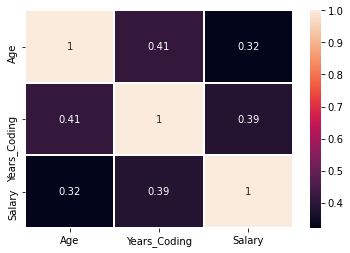

In [59]:
sns.heatmap(df.corr(),annot=True,lw=1)

<AxesSubplot:xlabel='Years_Coding', ylabel='Age'>

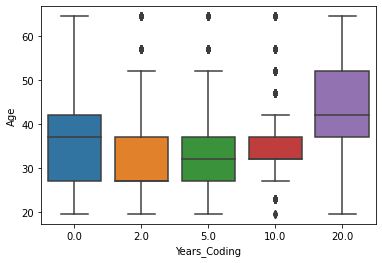

In [60]:
sns.boxplot(y='Age',x='Years_Coding',data=df)

<AxesSubplot:xlabel='Years_Coding', ylabel='Salary'>

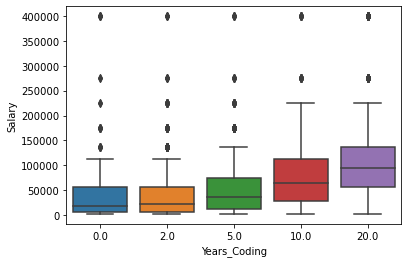

In [61]:
sns.boxplot(y='Salary',x='Years_Coding',data=df)

In [62]:
X = df[['Age', 'Years_Coding', 'Gender', 'Country','Formal_Education','Position']]

In [63]:
# Create dummy variables for categorical data (Gender, Country, Position, Education)
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Age,Years_Coding,Gender_Male,Gender_Prefer not to say,Gender_Prefer to self-describe,Country_Argentina,Country_Australia,Country_Austria,Country_Bangladesh,Country_Belarus,...,Formal_Education_Some college/university study without earning a bachelor’s degree,Position_DBA/Database Engineer,Position_Data Analyst,Position_Data Engineer,Position_Data Scientist,Position_Other,Position_Product/Project Manager,Position_Research Scientist,Position_Software Engineer,Position_Statistician
0,23.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,42.0,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,42.0,2.0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,52.0,20.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,23.0,5.0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
Y = df['Salary']

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5073, 78)
(3383, 78)
(5073,)
(3383,)


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [67]:
# print the intercept
print(model.intercept_)

-42724.17909003352


In [68]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,954.853759
Years_Coding,1706.397447
Gender_Male,8864.201217
Gender_Prefer not to say,16515.317976
Gender_Prefer to self-describe,-9659.445688
...,...
Position_Other,11382.907048
Position_Product/Project Manager,11039.208891
Position_Research Scientist,-6876.915572
Position_Software Engineer,5944.047223


The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.
A positive sign indicates that as the predictor variable increases, the Target variable also increases.
A negative sign indicates that as the predictor variable increases, the Target variable decreases.

In [69]:
predictions = model.predict(X_test)
predictions

array([143296.78593712,  68871.46376923,  57230.41290127, ...,
       150463.97263179,  18637.29785153,  31258.98920728])

<AxesSubplot:xlabel='Salary'>

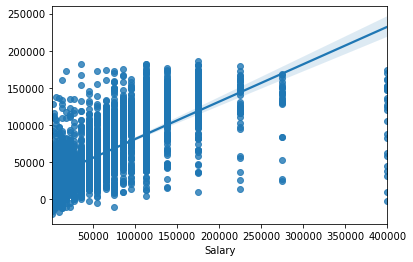

In [70]:
sns.regplot(y_test,predictions)

In [71]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     70.39
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        16:08:30   Log-Likelihood:                -61316.
No. Observations:                5073   AIC:                         1.228e+05
Df Residuals:                    4994   BIC:                         1.233e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

From the R-squared value, there's a 52% chance we can properly predict the Salary for Age, Education, Gender, Experience, and Position.